#### Build a Jupyter Notebook to do the following:
a.	Download the dataset into pandas dataframe <br>
b.	Remove ‘1M’ column and use the date from 1/1/1996 – 11/20/2016 (we will leave the last year out) <br>
c.	Construct series of daily differences <br>
d.	Compute correlations and volatilities among the series (using level data) <br>
e.	Compute correlations and volatilities among the series (using daily differences) <br>
f.	Plot the volatility curves computed in 2d & 2e <br>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#from matplotlib.finance import date2num

In [72]:
rates = pd.read_csv('HW1_data.csv').drop('1 Mo',axis=1).dropna()
daily_diff = rates.set_index('Date').diff().dropna()
corr_rates = rates.corr()
corr_diff = daily_diff.corr()
vol_rates = rates.std()
vol_diff = daily_diff.std()

In [74]:
corr_rates

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Y
3 Mo,1.000000,0.998918,0.996032,0.986673,0.977653,0.956862,0.937254,0.914724,0.874737,0.859671
6 Mo,0.998918,1.000000,0.998364,0.990045,0.981303,0.960755,0.940972,0.918583,0.877949,0.861858
1 Yr,0.996032,0.998364,1.000000,0.995625,0.988910,0.970961,0.952639,0.931478,0.892107,0.876857
2 Yr,0.986673,0.990045,0.995625,1.000000,0.998038,0.986578,0.972590,0.953131,0.917188,0.902901
3 Yr,0.977653,0.981303,0.988910,0.998038,1.000000,0.994324,0.983815,0.966634,0.933509,0.919791
5 Yr,0.956862,0.960755,0.970961,0.986578,0.994324,1.000000,0.996752,0.986415,0.960688,0.949276
7 Yr,0.937254,0.940972,0.952639,0.972590,0.983815,0.996752,1.000000,0.995114,0.977531,0.968025
10 Yr,0.914724,0.918583,0.931478,0.953131,0.966634,0.986415,0.995114,1.000000,0.991459,0.985636
20 Yr,0.874737,0.877949,0.892107,0.917188,0.933509,0.960688,0.977531,0.991459,1.000000,0.995245
30 Y,0.859671,0.861858,0.876857,0.902901,0.919791,0.949276,0.968025,0.985636,0.995245,1.000000


In [55]:
corr_diff

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Y
3 Mo,1.000000,0.857751,0.762564,0.542207,0.439164,0.268911,0.174134,0.117239,-0.015782,-0.025747
6 Mo,0.857751,1.000000,0.902561,0.689748,0.579364,0.386563,0.276192,0.211913,0.052493,0.034796
1 Yr,0.762564,0.902561,1.000000,0.841025,0.745604,0.561083,0.446944,0.375863,0.201743,0.176793
2 Yr,0.542207,0.689748,0.841025,1.000000,0.943581,0.825022,0.724492,0.651158,0.474854,0.438329
3 Yr,0.439164,0.579364,0.745604,0.943581,1.000000,0.921470,0.844253,0.780554,0.621879,0.584869
5 Yr,0.268911,0.386563,0.561083,0.825022,0.921470,1.000000,0.961232,0.921958,0.807936,0.772765
7 Yr,0.174134,0.276192,0.446944,0.724492,0.844253,0.961232,1.000000,0.969738,0.893852,0.862975
10 Yr,0.117239,0.211913,0.375863,0.651158,0.780554,0.921958,0.969738,1.000000,0.939225,0.916365
20 Yr,-0.015782,0.052493,0.201743,0.474854,0.621879,0.807936,0.893852,0.939225,1.000000,0.978712
30 Y,-0.025747,0.034796,0.176793,0.438329,0.584869,0.772765,0.862975,0.916365,0.978712,1.000000


In [76]:
print(vol_rates)

3 Mo     2.392956
6 Mo     2.419103
1 Yr     2.396583
2 Yr     2.350353
3 Yr     2.238812
5 Yr     2.003136
7 Yr     1.838768
10 Yr    1.628409
20 Yr    1.520352
30 Y     1.319253
dtype: float64


In [75]:
print(vol_diff)

3 Mo     0.069879
6 Mo     0.061751
1 Yr     0.057158
2 Yr     0.059367
3 Yr     0.059712
5 Yr     0.061623
7 Yr     0.062459
10 Yr    0.059863
20 Yr    0.057793
30 Y     0.056163
dtype: float64


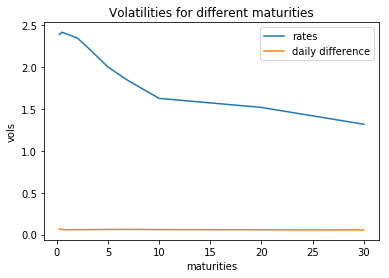

In [93]:
# plot volatilities for different maturities
#maturities = list(rates)[1:]
#float_years = []
#for i in range(len(maturities)):
#    float_years.append(date2num(datetime.datetime.strptime(maturities[i],' %Mo')))
maturities = [0.25,0.5,1,2,3,5,7,10,20,30]
plt.plot(maturities,vol_rates,label='rates')
plt.plot(maturities,vol_diff,label='daily difference')
plt.xlabel('maturities')
plt.ylabel('vols')
plt.legend()
plt.title('Volatilities for different maturities')
plt.show()